# NAME - DHANYA SRIVASTAVA
 # BATCH - DS2304

# Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
# HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
# Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
# Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


# Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
df = pd.read_csv(r"C:/Users/Lenovo/Downloads/HR analystics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
# checking data type of column

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#  checking the duplicate value
duplicate = df[df.duplicated()]


print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
df1=df.dropna()

In [10]:
print(df1.shape)
print(df.shape)

(1470, 35)
(1470, 35)


In [11]:
# Drop unwanted columns

df2=df1.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1)

print(df2.shape),print(df1.shape),print(df.shape)

(1470, 31)
(1470, 35)
(1470, 35)


(None, None, None)

In [12]:
df2.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# 1)Age: Numerical  , data type: int64

In [13]:
df['Age'].describe(include='all')

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

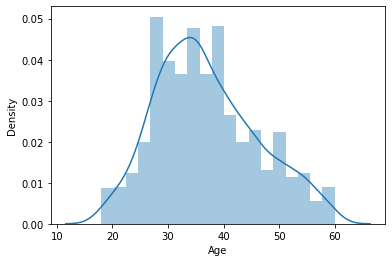

In [14]:
plt.plot()
sns.distplot(df['Age']) 
plt.show()

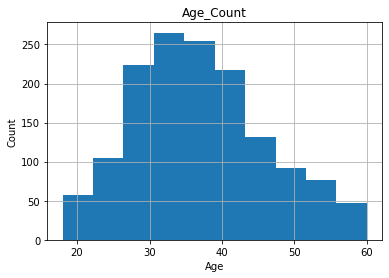

In [15]:
plt.plot()
df['Age'].hist(grid=True) #
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age_Count')
plt.show()

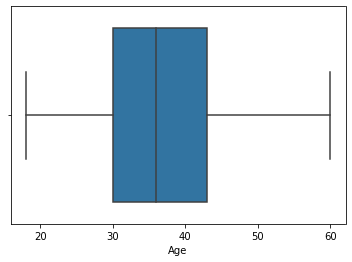

In [16]:
plt.plot()
sns.boxplot(df1['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

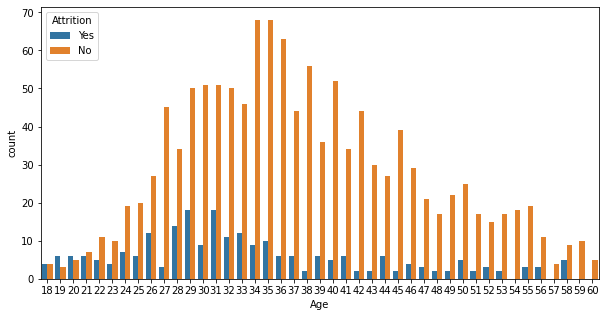

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", hue="Attrition",)

## Observation 

1) Age column numeric value given in year

2) Data type is normally distributed

3) No outliers in age column



# 2) Attrition : Employee leaving the company ,datatype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Attrition']=le.fit_transform(df2['Attrition'])
df2['Attrition'].describe(include='all')

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

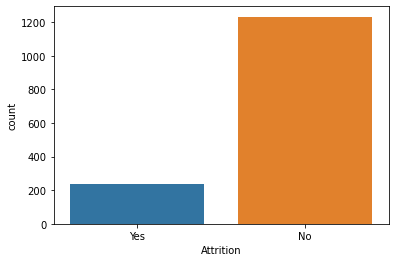

In [19]:
sns.countplot(data=df, x="Attrition" )

This is an imbalaced data . Need to fix this

# 3) BusinessTravel: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely), datatype: object


In [20]:
le=LabelEncoder()
df2['BusinessTravel']=le.fit_transform(df2['BusinessTravel'])

In [21]:
df2['BusinessTravel'].describe(include='all')

count    1470.000000
mean        1.607483
std         0.665455
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BusinessTravel, dtype: float64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

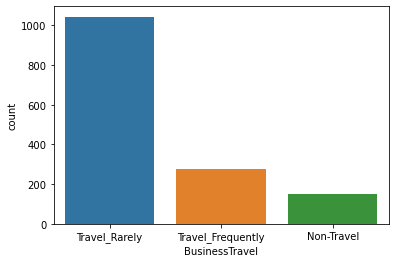

In [22]:
sns.countplot(data=df, x="BusinessTravel" )

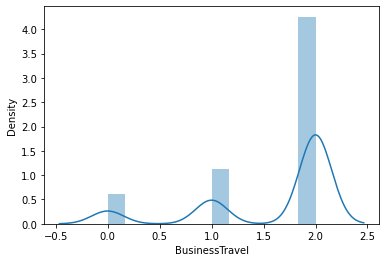

In [23]:
# distrubution plot to check the skewness

plt.plot()
sns.distplot(df2['BusinessTravel'])  
plt.show()

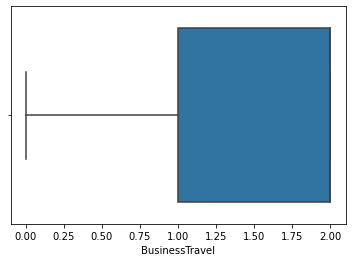

In [24]:
plt.plot()
sns.boxplot(df2['BusinessTravel'])
plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

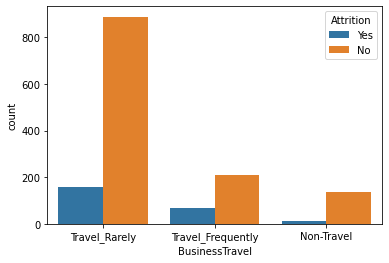

In [25]:
sns.countplot(data=df, x="BusinessTravel", hue="Attrition",)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

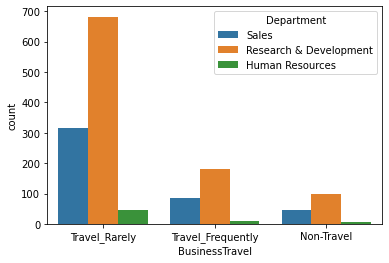

In [26]:
sns.countplot(data=df, x="BusinessTravel", hue="Department",)

# Observation 

1) maximum number of people who travels rarely


2) maximum number of people who travels rarely are from sales and R&D

# 4) DailyRate Numerical Value - Salary Level  datatye: int64 


In [27]:
df['DailyRate'].describe(include='all')

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

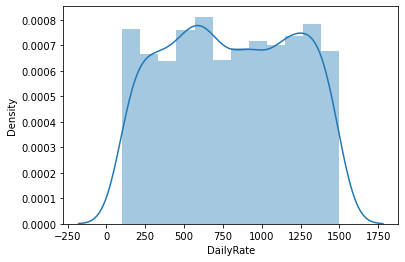

In [28]:
#distrubution plot to check the skewness


plt.plot()
sns.distplot(df['DailyRate'])  
plt.show()

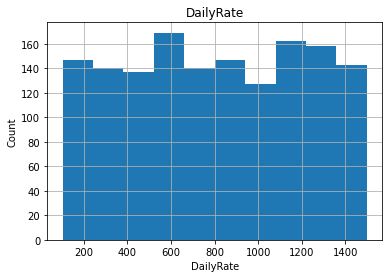

In [29]:
plt.plot()
df['DailyRate'].hist(grid=True) #
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.title('DailyRate')
plt.show()

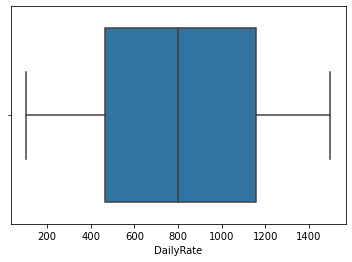

In [30]:
plt.plot()
sns.boxplot(df1['DailyRate'])
plt.show()

# Observation for DailyRate column
No outliers noramlly normally distributed

# 5) Department : (1=HR, 2=R&D, 3=Sales)  datatype: object


In [31]:
le=LabelEncoder()
df2['Department']=le.fit_transform(df2['Department'])

In [32]:
df['Department'].describe(include='all')

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

<AxesSubplot:xlabel='Department', ylabel='count'>

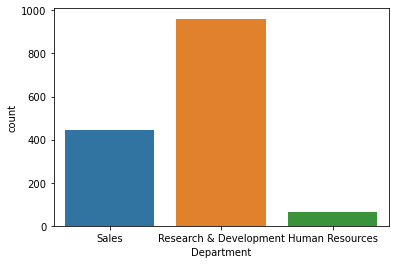

In [33]:
sns.countplot(data=df, x="Department", )

<AxesSubplot:xlabel='Department', ylabel='count'>

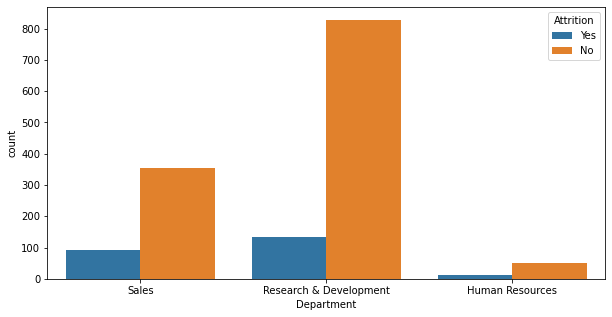

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition",)

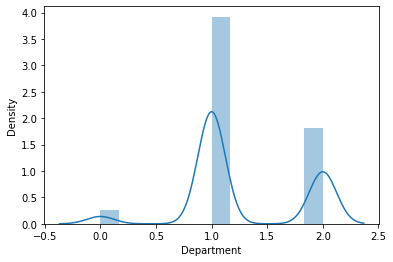

In [35]:
plt.plot()
sns.distplot(df2['Department']) 
plt.show()

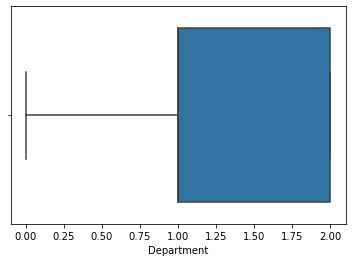

In [36]:
plt.plot()
sns.boxplot(df2['Department'])
plt.show()

# 6) DistanceFromHome  datatype :int64 


In [37]:
df['DistanceFromHome'].describe(include='all')

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

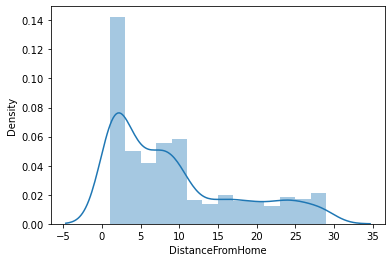

In [38]:
plt.plot()
sns.distplot(df['DistanceFromHome'])  
plt.show()

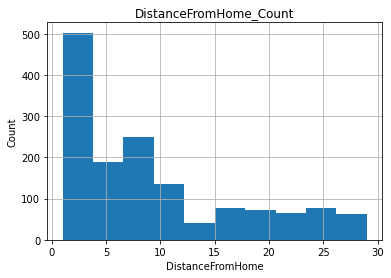

In [39]:
plt.plot()
df['DistanceFromHome'].hist(grid=True) #
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('DistanceFromHome_Count')
plt.show()

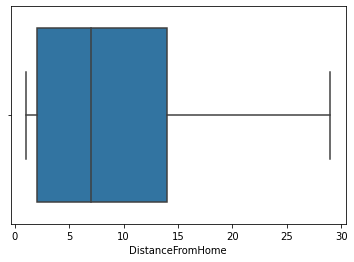

In [41]:
plt.plot()
sns.boxplot(df1['DistanceFromHome'])
plt.show()

# Observation 

some skewness is there

no outliers

maximum people who prefer to stay near about company

# 7) Education  datatype : int64 


In [42]:
df['Education'].describe(include='all')

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

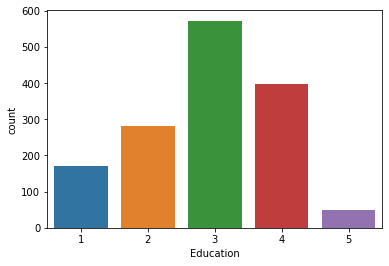

In [43]:
sns.countplot(data=df, x="Education", )

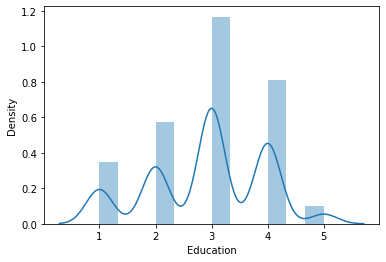

In [44]:
plt.plot()
sns.distplot(df['Education'])  
plt.show()

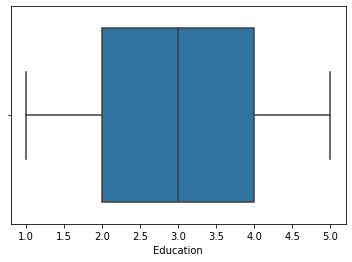

In [45]:
plt.plot()
sns.boxplot(df1['Education'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

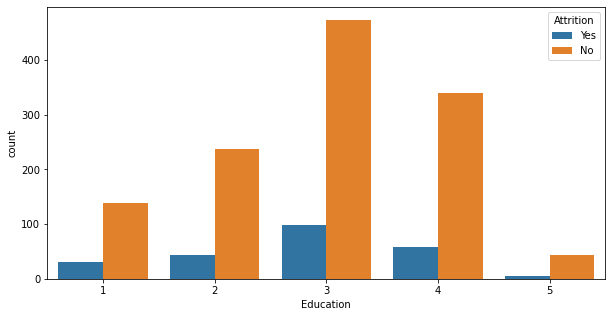

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Education", hue="Attrition",)

# 8) EducationField


In [47]:
le=LabelEncoder()
df2['EducationField']=le.fit_transform(df2['EducationField'])


In [48]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:xlabel='EducationField', ylabel='count'>

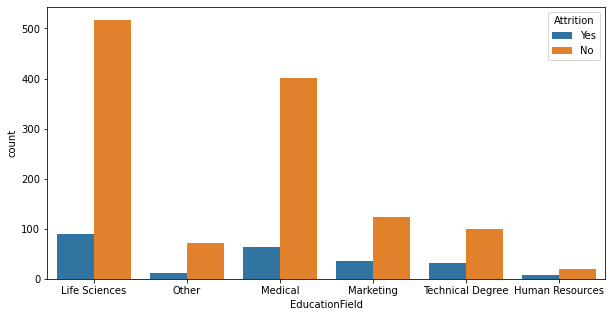

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField", hue="Attrition",)

# We dont have too much with this column we can drop this

# 9) EmployeeCount || datatype int64

# 10) EmployeeNumber


# 11) EnvironmentSatisfaction datatye: int 


In [50]:
df['EnvironmentSatisfaction'].describe(include='all')

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

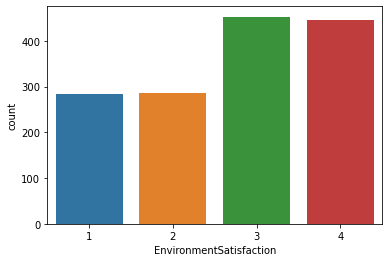

In [51]:
sns.countplot(data=df, x="EnvironmentSatisfaction", )

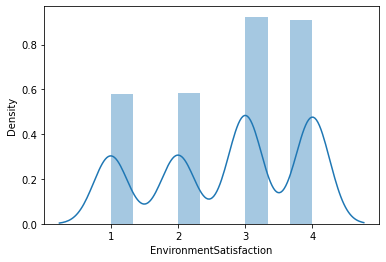

In [52]:
plt.plot()
sns.distplot(df['EnvironmentSatisfaction'])  
plt.show()

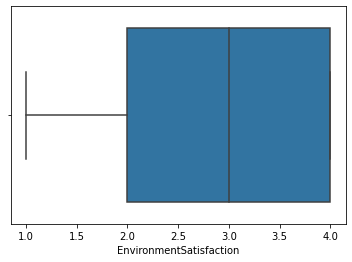

In [53]:
plt.plot()
sns.boxplot(df2['EnvironmentSatisfaction'])
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

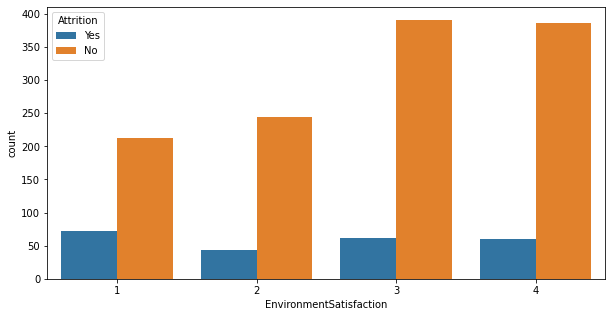

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EnvironmentSatisfaction", hue="Attrition",)

# 12) Gender datatype :object 


In [55]:
df2['Gender'].replace(['Male','Female'],[0,1],inplace=True)


In [56]:
df['Gender'].describe(include='all')

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

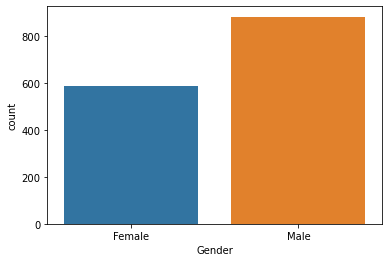

In [57]:
sns.countplot(data=df, x="Gender", )

<AxesSubplot:xlabel='Gender', ylabel='count'>

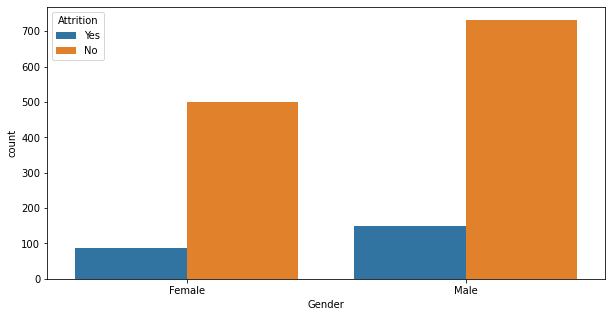

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Gender", hue="Attrition",)

We can see that mens are more in number than woman.



# 13) HourlyRate datatype int


In [59]:
df['HourlyRate'].describe(include='all')

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

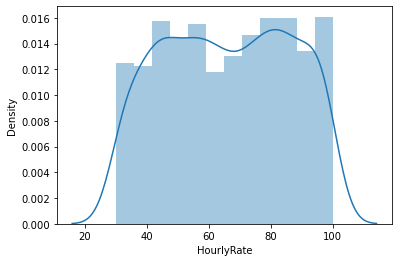

In [60]:
plt.plot()
sns.distplot(df['HourlyRate']) 
plt.show()

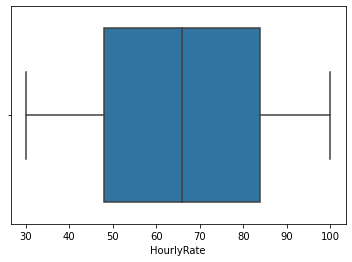

In [61]:
plt.plot()
sns.boxplot(df2['HourlyRate'])
plt.show()

# 14) JobInvolvement datatype int


In [62]:
df['JobInvolvement'].describe(include='all')

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

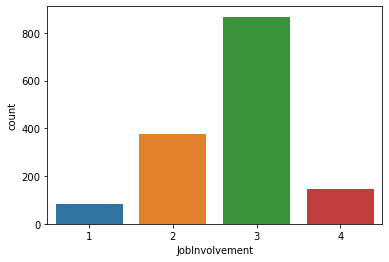

In [63]:
sns.countplot(data=df, x="JobInvolvement", )

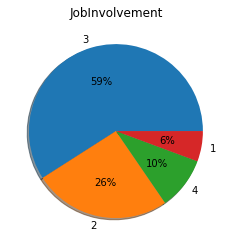

In [64]:
#pie chart
label=df['JobInvolvement'].unique()
y=df['JobInvolvement'].value_counts()
plt.title('JobInvolvement')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

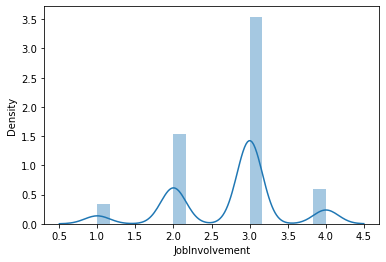

In [65]:
plt.plot()
sns.distplot(df['JobInvolvement'])  
plt.show()

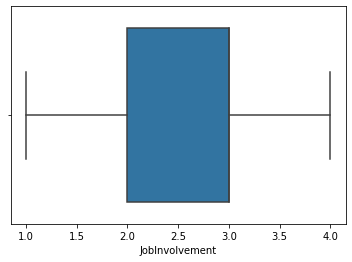

In [69]:
plt.plot()
sns.boxplot(df2['JobInvolvement'])
plt.show()

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

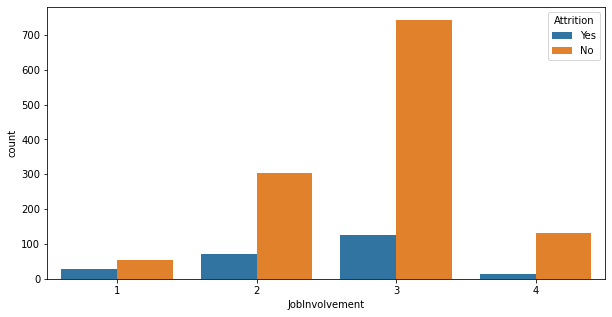

In [70]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobInvolvement", hue="Attrition",)

# 15 JobRole datatype object

In [71]:
#checking unique
print(df['JobRole'].unique())

print(df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [72]:
le=LabelEncoder()
df2['JobRole']=le.fit_transform(df2['JobRole'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

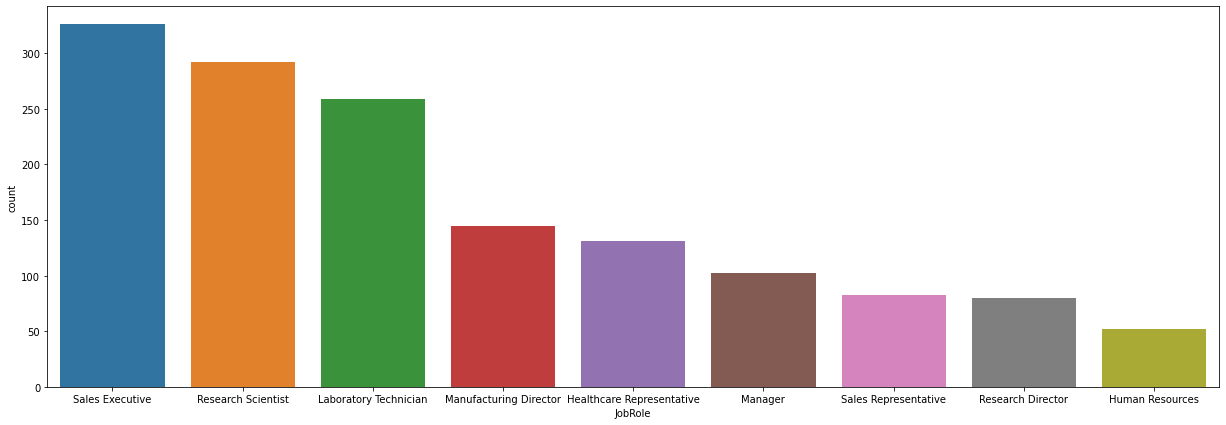

In [73]:
#count plot
plt.figure(figsize=(21,7))
sns.countplot(df['JobRole'])

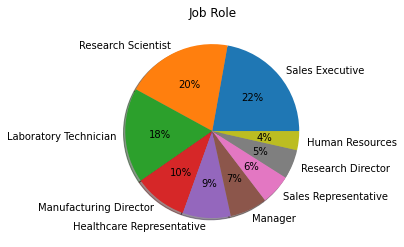

In [74]:
#pie chart
label=df['JobRole'].unique()
y=df['JobRole'].value_counts()


plt.title('Job Role')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

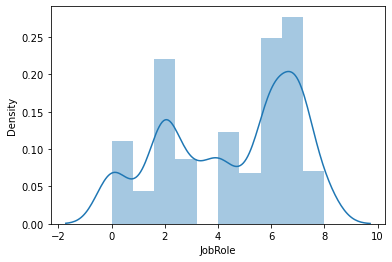

In [75]:
plt.plot()
sns.distplot(df2['JobRole'])  
plt.show()

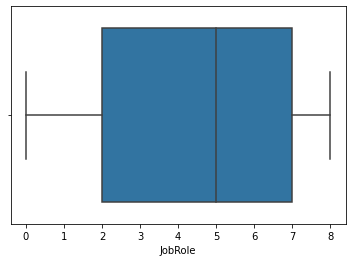

In [76]:
plt.plot()
sns.boxplot(df2['JobRole'])
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

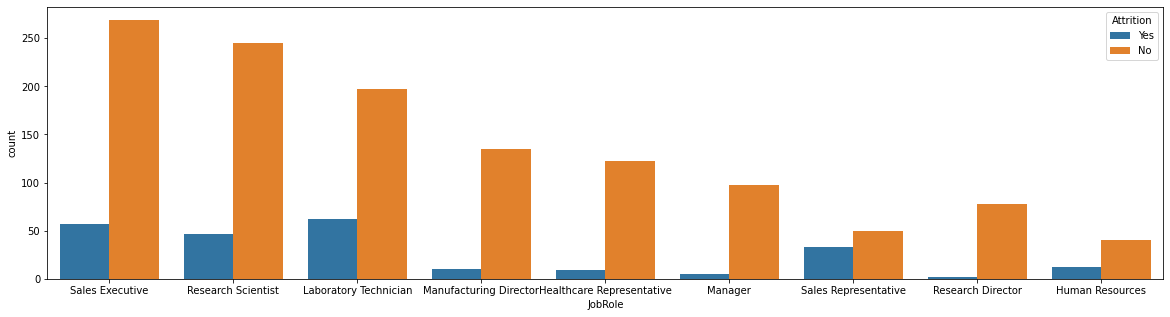

In [77]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition",)

# 16) JobSatisfaction datatype int


In [78]:
df['JobSatisfaction'].describe(include='all')

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

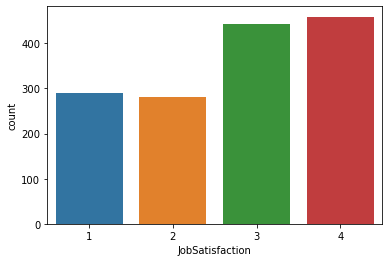

In [79]:
sns.countplot(data=df, x="JobSatisfaction", )

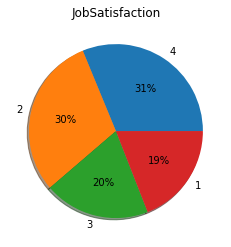

In [80]:
#pie chart
label=df['JobSatisfaction'].unique()
y=df['JobSatisfaction'].value_counts()


plt.title('JobSatisfaction')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

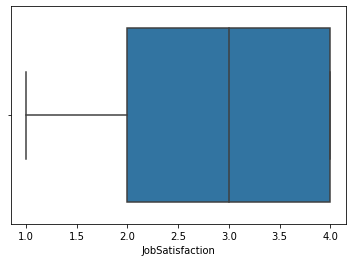

In [81]:
plt.plot()
sns.boxplot(df2['JobSatisfaction'])
plt.show()

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

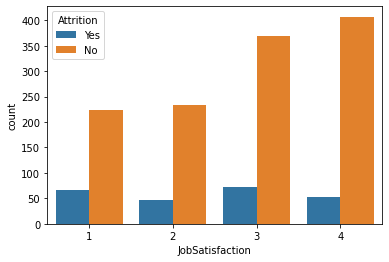

In [82]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition",)

# 18 MaritalStatus


In [83]:
le=LabelEncoder()
df2['MaritalStatus']=le.fit_transform(df2['MaritalStatus'])


In [84]:
#checking unique
print(df['MaritalStatus'].unique())

print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

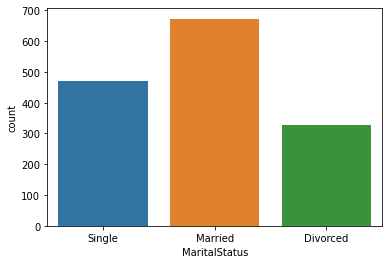

In [85]:
#count plot
sns.countplot(df['MaritalStatus'])

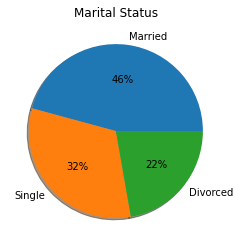

In [86]:
#pie chart
label=(['Married','Single','Divorced'])
y=df['MaritalStatus'].value_counts()

plt.title('Marital Status')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

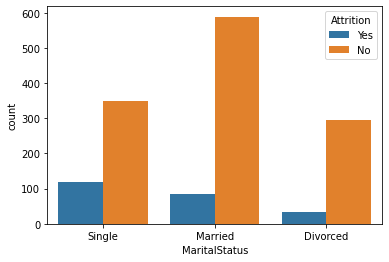

In [87]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition",)

# 19 :Monthly income

In [88]:
df['MonthlyIncome'].describe(include='all')

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

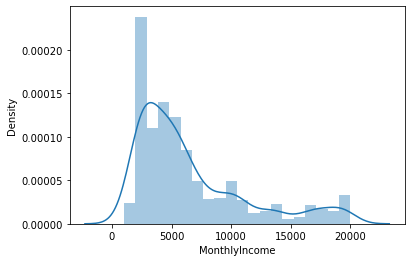

In [89]:
plt.plot()
sns.distplot(df['MonthlyIncome']) #distrubution plot to check the skewness 
plt.show()

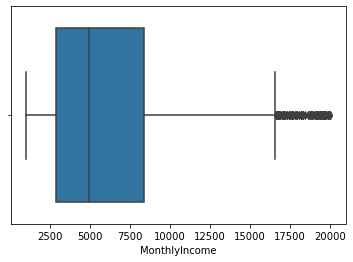

In [90]:
plt.plot()
sns.boxplot(df2['MonthlyIncome'])
plt.show()

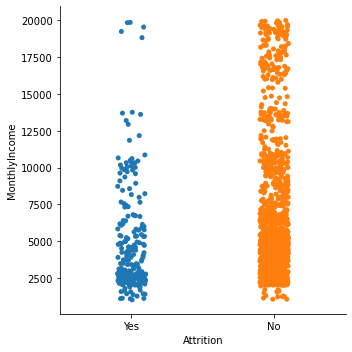

In [91]:
sns.catplot(x = 'Attrition', y = 'MonthlyIncome', data =df)
plt.show()

# 20 MonthlyRate


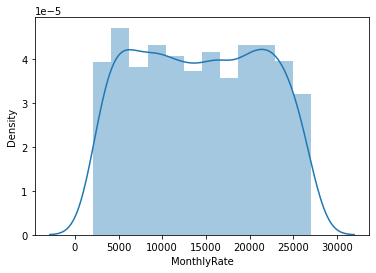

In [92]:
plt.plot()
sns.distplot(df['MonthlyRate']) #distrubution plot to check the skewness 
plt.show()

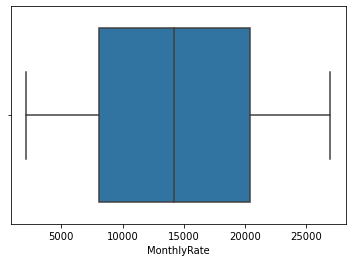

In [93]:
plt.plot()
sns.boxplot(df2['MonthlyRate'])
plt.show()

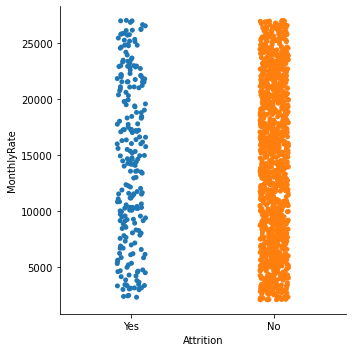

In [94]:
sns.catplot(x = 'Attrition', y = 'MonthlyRate', data =df)
plt.show()

# 21) NumCompaniesWorked


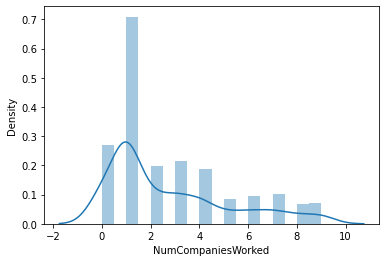

In [95]:
plt.plot()
sns.distplot(df['NumCompaniesWorked']) #distrubution plot to check the skewness 
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

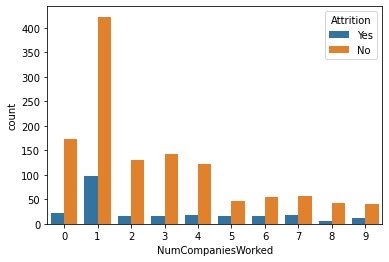

In [96]:
sns.countplot(data=df, x="NumCompaniesWorked", hue="Attrition",)

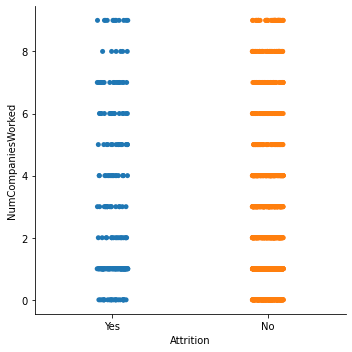

In [97]:
sns.catplot(x = 'Attrition', y = 'NumCompaniesWorked', data =df)
plt.show()

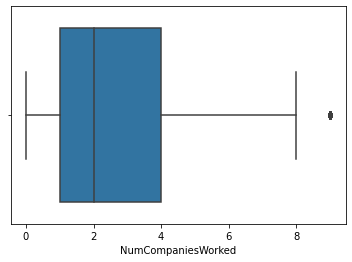

In [98]:
plt.plot()
sns.boxplot(df2['NumCompaniesWorked'])
plt.show()

# 22 OverTime

In [99]:

le=LabelEncoder()
df2['OverTime']=le.fit_transform(df2['OverTime'])




In [100]:
df2['OverTime'].describe(include='all')

count    1470.000000
mean        0.282993
std         0.450606
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

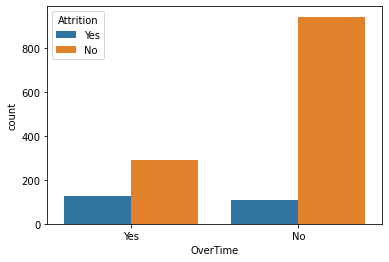

In [101]:
sns.countplot(data=df, x="OverTime", hue="Attrition",)

# 23 PercentSalaryHike


In [102]:
df2['PercentSalaryHike'].describe(include='all')

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

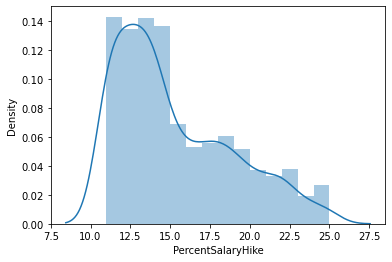

In [103]:
plt.plot()
sns.distplot(df['PercentSalaryHike']) #distrubution plot to check the skewness 
plt.show()

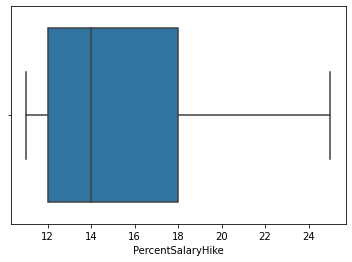

In [104]:
plt.plot()
sns.boxplot(df2['PercentSalaryHike'])
plt.show()

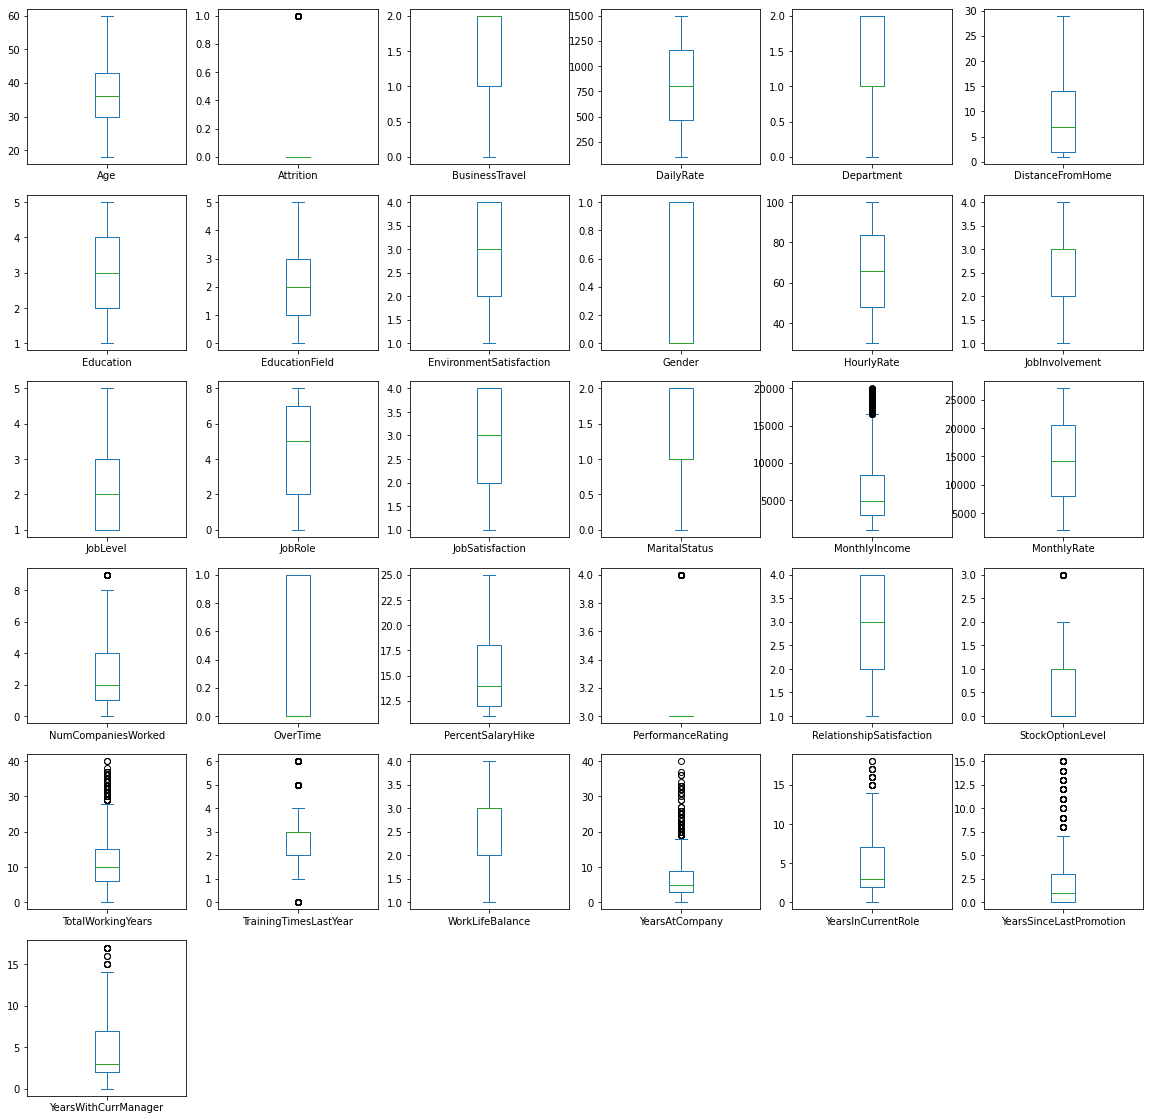

In [105]:
# visualizing outliers for all columns


df2.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

# Spliting the variable


In [106]:
only_f=df2.drop('Attrition',axis=1)
lbl =df2['Attrition']

In [107]:
import imblearn
from imblearn.over_sampling import SMOTE

In [108]:
smt=SMOTE()
train_x,train_y=smt.fit_resample(only_f,lbl)

In [109]:
train_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Now Dataset is Balanced .


In [110]:
#make dataframe
df3=pd.DataFrame(train_x)


In [111]:
df3['Attrition']=train_y

In [112]:

df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,1,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,0,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,0,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,1,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,0,40,...,4,1,6,3,3,2,2,2,2,0


In [113]:
#checking shape of dataset
df3.shape

(2466, 31)

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
threshold=3
df4=df3[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3.shape[0]-df4.shape[0])/df3.shape[0])

percentage of loss of data by zscore is : 0.10786699107866991


In [115]:
#Independent variables
x=df4.drop('Attrition',axis=1)


In [116]:
#Dependent variables
y=df4['Attrition']


In [117]:
x.skew()

Age                         0.580376
BusinessTravel             -0.947894
DailyRate                   0.064956
Department                  0.201788
DistanceFromHome            0.783485
Education                  -0.088303
EducationField              0.630532
EnvironmentSatisfaction    -0.023274
Gender                      0.945810
HourlyRate                  0.028712
JobInvolvement             -0.299407
JobLevel                    1.024957
JobRole                    -0.366557
JobSatisfaction            -0.025486
MaritalStatus              -0.148640
MonthlyIncome               1.517920
MonthlyRate                 0.052400
NumCompaniesWorked          1.057801
OverTime                    0.975609
PercentSalaryHike           0.827942
PerformanceRating           2.711253
RelationshipSatisfaction   -0.044948
StockOptionLevel            0.975448
TotalWorkingYears           1.151328
TrainingTimesLastYear       0.522351
WorkLifeBalance            -0.390833
YearsAtCompany              1.197569
Y

In [118]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [119]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])


In [120]:
data=pipeline.fit_transform(x)


In [121]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)


In [122]:
x.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.835820,0.822314,0.872873,1.540891,-1.491759,-0.712544,-0.940150,-0.425541,1.578627,1.511626,...,-0.329108,-1.444271,-0.818608,0.133978,-2.420891,-1.905579,0.530585,0.595588,-0.932081,0.877580
1,1.557372,-1.021119,-1.359090,-0.325997,-0.021551,-1.715232,-0.940150,0.508756,-0.633462,-0.192794,...,3.038512,1.437684,1.087711,0.488889,0.421222,0.555360,1.290408,1.324989,0.199508,1.312376
2,0.417747,0.822314,1.536857,-0.325997,-1.226410,-0.712544,1.384801,1.403632,-0.633462,1.411956,...,-0.329108,-0.452645,-0.818608,-0.063881,0.421222,0.555360,-1.746398,-1.338466,-0.932081,-1.285769
3,-0.047824,-1.021119,1.582369,-0.325997,-0.983108,1.365255,-0.940150,1.403632,1.578627,-0.463756,...,-0.329108,0.505464,-0.818608,0.133978,0.421222,0.555360,0.956472,1.324989,1.213099,-1.285769
4,-0.856390,0.822314,-0.467791,-0.325997,-1.226410,-1.715232,0.815073,-1.411795,-0.633462,-1.358941,...,-0.329108,1.437684,1.087711,-0.277249,0.421222,0.555360,-0.754059,-0.169199,0.836620,-0.148942


In [123]:
#after removing skewness
x.skew()


Age                         0.012069
BusinessTravel             -0.479749
DailyRate                  -0.039030
Department                  0.020711
DistanceFromHome            0.117925
Education                  -0.043336
EducationField              0.061646
EnvironmentSatisfaction    -0.082429
Gender                      0.945810
HourlyRate                 -0.045021
JobInvolvement             -0.041037
JobLevel                    0.298869
JobRole                    -0.182193
JobSatisfaction            -0.083658
MaritalStatus              -0.091679
MonthlyIncome               0.239159
MonthlyRate                -0.045585
NumCompaniesWorked          0.162138
OverTime                    0.975609
PercentSalaryHike           0.105513
PerformanceRating           2.711253
RelationshipSatisfaction   -0.084592
StockOptionLevel            0.442599
TotalWorkingYears           0.046130
TrainingTimesLastYear       0.002805
WorkLifeBalance            -0.043549
YearsAtCompany              0.123828
Y

# VIF(Variance Inflation Factor)


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [126]:
vif()

,Variables,VIF Factor
0,Age,2.039211
1,BusinessTravel,1.049226
2,DailyRate,1.045068
3,Department,2.307019
4,DistanceFromHome,1.058826
5,Education,1.107730
6,EducationField,1.055634
7,EnvironmentSatisfaction,1.085727
8,Gender,1.063665
9,HourlyRate,1.044653


In [127]:
# BusinessTravel variable and DailyRate as same VIF Factor so,drop DailyRate variable
x.drop('DailyRate',inplace=True,axis=1)

In [128]:
# DistanceFromHome and Education variables as Same VIF Factor so , drop Education variable
x.drop('Education',axis=1,inplace=True)

In [129]:
# EnvironmentSatisfaction and JobInvolvement as Same VIF Factor so, drop JobInvolvement variable
x.drop('JobInvolvement',axis=1,inplace=True)

In [130]:
# PercentSalaryHike and PerformanceRating variables as same VIF Factor so, drop PerformanceRating variable
x.drop('PerformanceRating',axis=1,inplace=True)

In [131]:
#Gender And HourlyRate variable has Same VIF Factor So, drop HourlyRate variable
x.drop('HourlyRate',axis=1,inplace=True)

In [132]:
#After removing columns
x.shape

(2200, 25)

# standard scaler

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scale=MinMaxScaler()

In [135]:
x=scale.fit_transform(x)

In [136]:
#after applying MinMaxscaler
x.shape

(2200, 25)

# Model building

In [137]:

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [138]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()


In [139]:

list_model=[lg,gnb,dtc,knc,svc,rfc,abc,gbc]

In [140]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [141]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8636363636363636 Random state:- 32


accuracy_score:- 0.8272727272727273
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       293
           1       0.85      0.83      0.84       367

    accuracy                           0.83       660
   macro avg       0.82      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



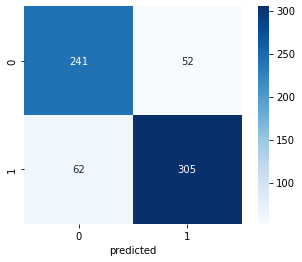

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [143]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8 Random state:- 2


accuracy_score:- 0.753030303030303
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       326
           1       0.74      0.79      0.76       334

    accuracy                           0.75       660
   macro avg       0.75      0.75      0.75       660
weighted avg       0.75      0.75      0.75       660



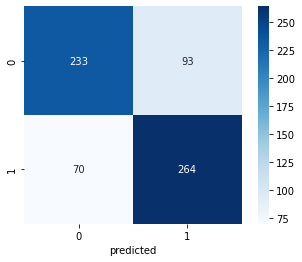

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [145]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8303030303030303 Random state:- 84


accuracy_score:- 0.7863636363636364
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       279
           1       0.84      0.78      0.81       381

    accuracy                           0.79       660
   macro avg       0.78      0.79      0.78       660
weighted avg       0.79      0.79      0.79       660



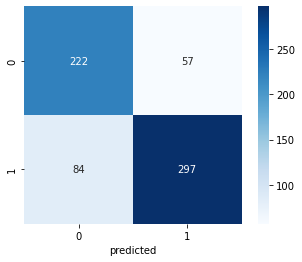

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [147]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8712121212121212 Random state:- 41


accuracy_score:- 0.8378787878787879
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       220
           1       0.97      0.78      0.87       440

    accuracy                           0.84       660
   macro avg       0.83      0.86      0.83       660
weighted avg       0.87      0.84      0.84       660



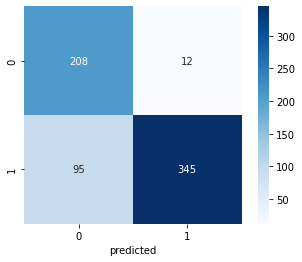

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [149]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9030303030303031 Random state:- 32


accuracy_score:- 0.8909090909090909
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       308
           1       0.91      0.88      0.90       352

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



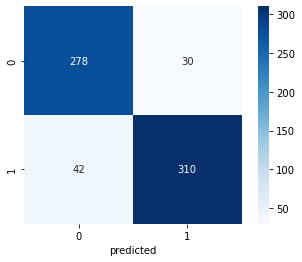

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [151]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9257575757575758 Random state:- 62


accuracy_score:- 0.8878787878787879
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       295
           1       0.91      0.89      0.90       365

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



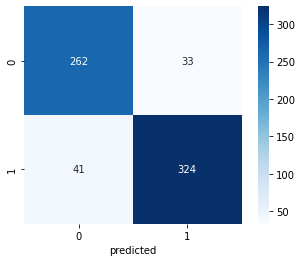

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

# Cross validation

In [153]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.67045455 0.875      0.84318182 0.84545455 0.85      ]
0.8168181818181818
GaussianNB()
[0.675      0.77727273 0.76818182 0.76590909 0.74772727]
0.7468181818181818
DecisionTreeClassifier()
[0.69545455 0.85227273 0.82045455 0.85454545 0.78863636]
0.8022727272727274
KNeighborsClassifier()
[0.80227273 0.86363636 0.83863636 0.80909091 0.86363636]
0.8354545454545456
SVC()
[0.69545455 0.91136364 0.88863636 0.89772727 0.88636364]
0.8559090909090911
RandomForestClassifier()
[0.74545455 0.94545455 0.92727273 0.93181818 0.925     ]
0.8949999999999999
AdaBoostClassifier()
[0.64545455 0.91136364 0.86363636 0.86363636 0.87727273]
0.8322727272727273
GradientBoostingClassifier()
[0.66818182 0.93181818 0.91136364 0.89318182 0.90227273]
0.8613636363636363


In [154]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}


In [155]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=5)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.9006493506493507
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')


In [156]:
grid_pred=rfc_grid.predict(x_test)

In [157]:
def confusion_plot1():
    print('accuracy_score:-',accuracy_score(grid_pred,y_test))
    print(rfc_grid.best_estimator_)
    print(rfc_grid.best_params_)
    print('\nClassification Report')
    print(classification_report(grid_pred,y_test))
    matrix = confusion_matrix(grid_pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.9119878603945372
RandomForestClassifier(criterion='entropy')
{'criterion': 'entropy', 'max_features': 'auto'}

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       291
           1       0.93      0.91      0.92       368

    accuracy                           0.91       659
   macro avg       0.91      0.91      0.91       659
weighted avg       0.91      0.91      0.91       659



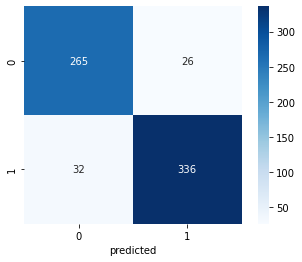

In [178]:
confusion_plot1()

# ROC curve

In [158]:

rfc_pred=rfc_grid.best_estimator_.predict_proba(x_test)

In [159]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class=2

In [160]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc_pred[:,i], pos_label=i)

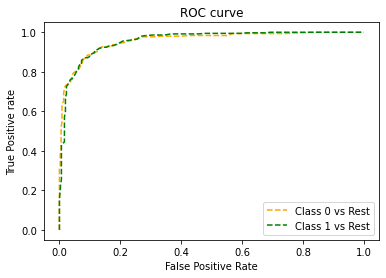

In [161]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300); 

# Save The Model

In [162]:

import joblib
joblib.dump(rfc_grid.best_estimator_,'HR_Analytics_Project.obj')

['HR_Analytics_Project.obj']